In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor

In [ ]:
df = pd.read_csv('Traindata.csv')
df.shape

(150150, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
df.head(1)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20


In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,254761.195226,206.626751,219.424262,0.095612,0.133201,51.674543
std,61385.825580,615.593192,85547.587866,103.308516,110.960204,0.294059,0.339793,60.207962
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.000000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.000000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.000000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


<ipython-input-8-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

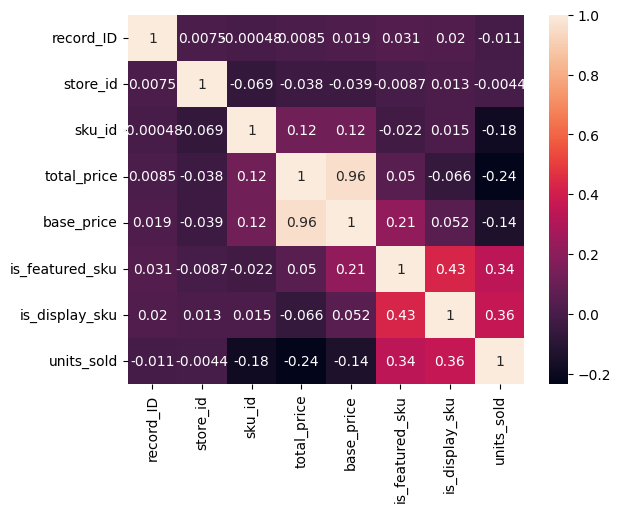

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'units_sold') ):
        col_list.append(col)

X = df[col_list]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature       VIF
0        record_ID  3.261466
1           sku_id  5.211038
2      total_price  4.247786
3  is_featured_sku  1.364297
4   is_display_sku  1.414198


In [ ]:
df.drop(columns = 'store_id', inplace = True, axis = 1)

In [ ]:
x = df[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]
y = df['units_sold']

In [ ]:
df.shape

(150149, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150149 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150149 non-null  int64  
 1   week             150149 non-null  object 
 2   store_id         150149 non-null  int64  
 3   sku_id           150149 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150149 non-null  float64
 6   is_featured_sku  150149 non-null  int64  
 7   is_display_sku   150149 non-null  int64  
 8   units_sold       150149 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 11.5+ MB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 0)

##### Train Test

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(x_train)
scaled_df = pd.DataFrame(X_scaled_train, columns=x_train.columns)
x_train = scaled_df

scaler = StandardScaler()
X_scaled_test = scaler.fit_transform(x_test)
scaled_df = pd.DataFrame(X_scaled_test, columns=x_train.columns)
x_test = scaled_df

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120119, 5)
(30030, 5)
(120119,)
(30030,)


In [ ]:
regression_rmse = []
regression_models = []
r2_scores= []
def fit_predict_regression(model, x_train, x_test, y_train, y_test,regression_rmse):
    model = model
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    regression_models.append(str(model))
    print(f"RMSE of {model}: {rmse}")
    #plt.figure(figsize = (4,3))
    #x_values = range(len(y_pred))
    # Plot 'expected' as dots (scatter plot)
    #plt.scatter(x_values, y_test, label='Expected', marker='o', color='red')
    # Plot 'y_pred' as a line
    #plt.plot(x_values, y_pred, label='Predicted', linestyle='-', color='green')
    # Add labels and legend
    #plt.title(f"{model}")
    #plt.xlabel('Sample Index')
    #plt.ylabel('Values')
    #plt.legend()
    # Show the plot
    #plt.show()
    return y_pred

y_pred_lr = fit_predict_regression(LinearRegression(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_r = fit_predict_regression(Ridge(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_l = fit_predict_regression(Lasso(alpha=.5),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_e = fit_predict_regression(ElasticNetCV(cv = 5, random_state = 0),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_sgd = fit_predict_regression(SGDRegressor(max_iter=1000, tol=1),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_svr = fit_predict_regression(SVR(C=1.0, epsilon=0.2, kernel = "poly"),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_knn = fit_predict_regression(KNeighborsRegressor(n_neighbors=9),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_dtr = fit_predict_regression(DecisionTreeRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_gbr = fit_predict_regression(GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error'),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_hgbr = fit_predict_regression(HistGradientBoostingRegressor(),x_train,x_test,y_train,y_test,regression_rmse)
y_pred_rf = fit_predict_regression(RandomForestRegressor(),x_train,x_test,y_train,y_test,regression_rmse)

RMSE of LinearRegression(): 52.72178567461855
RMSE of Ridge(alpha=0.5): 52.721785810834255
RMSE of Lasso(alpha=0.5): 52.72831909835125
RMSE of ElasticNetCV(cv=5, random_state=0): 52.72505010915605
RMSE of SGDRegressor(tol=1): 52.764753137162096
RMSE of SVR(epsilon=0.2, kernel='poly'): 53.11013579066453
RMSE of KNeighborsRegressor(n_neighbors=9): 40.14869402298118
RMSE of DecisionTreeRegressor(): 56.910482019597794
RMSE of GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=0): 50.05545804934322
RMSE of HistGradientBoostingRegressor(): 42.27429539112079
RMSE of RandomForestRegressor(): 46.13405582502439


In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfr = pd.DataFrame(dic)
dfr.sort_values(by = ['RMSE'], ascending = True)

,Base Models,RMSE,R2 Scores
6,KNeighborsRegressor(n_neighbors=9),40.148694,0.564006
9,HistGradientBoostingRegressor(),42.274295,0.516618
10,RandomForestRegressor(),46.134056,0.424320
8,"GradientBoostingRegressor(max_depth=1, n_estim...",50.055458,0.322295
0,LinearRegression(),52.721786,0.248172
1,Ridge(alpha=0.5),52.721786,0.248172
3,"ElasticNetCV(cv=5, random_state=0)",52.725050,0.248079
2,Lasso(alpha=0.5),52.728319,0.247986
4,SGDRegressor(tol=1),52.764753,0.246947
5,"SVR(epsilon=0.2, kernel='poly')",53.110136,0.237056


In [ ]:
regression_rmse = []
r2_scores= []
y_pred_lr = y_pred_lr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_lr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_lr))

y_pred_r = y_pred_r.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_r, squared=False))
r2_scores.append(r2_score(y_test, y_pred_r))

y_pred_l = y_pred_l.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_l, squared=False))
r2_scores.append(r2_score(y_test, y_pred_l))

y_pred_e = y_pred_e.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_e, squared=False))
r2_scores.append(r2_score(y_test, y_pred_e))

y_pred_sgd = y_pred_sgd.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_sgd, squared=False))
r2_scores.append(r2_score(y_test, y_pred_sgd))

y_pred_svr = y_pred_svr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_svr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_svr))

y_pred_knn = y_pred_knn.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_knn, squared=False))
r2_scores.append(r2_score(y_test, y_pred_knn))

y_pred_dtr = y_pred_dtr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_dtr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_dtr))

y_pred_gbr = y_pred_gbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_gbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_gbr))

y_pred_hgbr = y_pred_hgbr.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_hgbr, squared=False))
r2_scores.append(r2_score(y_test, y_pred_hgbr))

y_pred_rf = y_pred_rf.astype(int)
regression_rmse.append(mean_squared_error(y_test, y_pred_rf, squared=False))
r2_scores.append(r2_score(y_test, y_pred_rf))

In [ ]:
dic = {"Base Models":regression_models,
       "RMSE":regression_rmse,
       "R2 Scores":r2_scores}
dfrr = pd.DataFrame(dic)
dfrr.sort_values(by = ['RMSE'], ascending = True)

,Base Models,RMSE,R2 Scores
6,KNeighborsRegressor(n_neighbors=9),40.149559,0.563987
9,HistGradientBoostingRegressor(),42.344317,0.515015
10,RandomForestRegressor(),46.188431,0.422962
8,"GradientBoostingRegressor(max_depth=1, n_estim...",50.113899,0.320711
0,LinearRegression(),52.717249,0.248302
1,Ridge(alpha=0.5),52.717249,0.248302
3,"ElasticNetCV(cv=5, random_state=0)",52.721479,0.248181
2,Lasso(alpha=0.5),52.730202,0.247932
4,SGDRegressor(tol=1),52.758998,0.247111
5,"SVR(epsilon=0.2, kernel='poly')",53.222631,0.233820


In [ ]:
x_train.shape

(120119, 5)

In [ ]:
neighbours = np.arange(1,100,2)

In [ ]:
neighbours

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [ ]:
neighbours = np.arange(1,300,3)
regression_rmse = []
r2_scores = []
for i in neighbours:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    #regression_models.append(str(model))
    #print(f"RMSE of {model}: {rmse}")
    #print(f"R2 of {model}: {r2_score(y_test, y_pred)}")
    print(i)

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
241
244
247
250
253
256
259
262
265
268
271
274
277
280
283
286
289
292
295
298


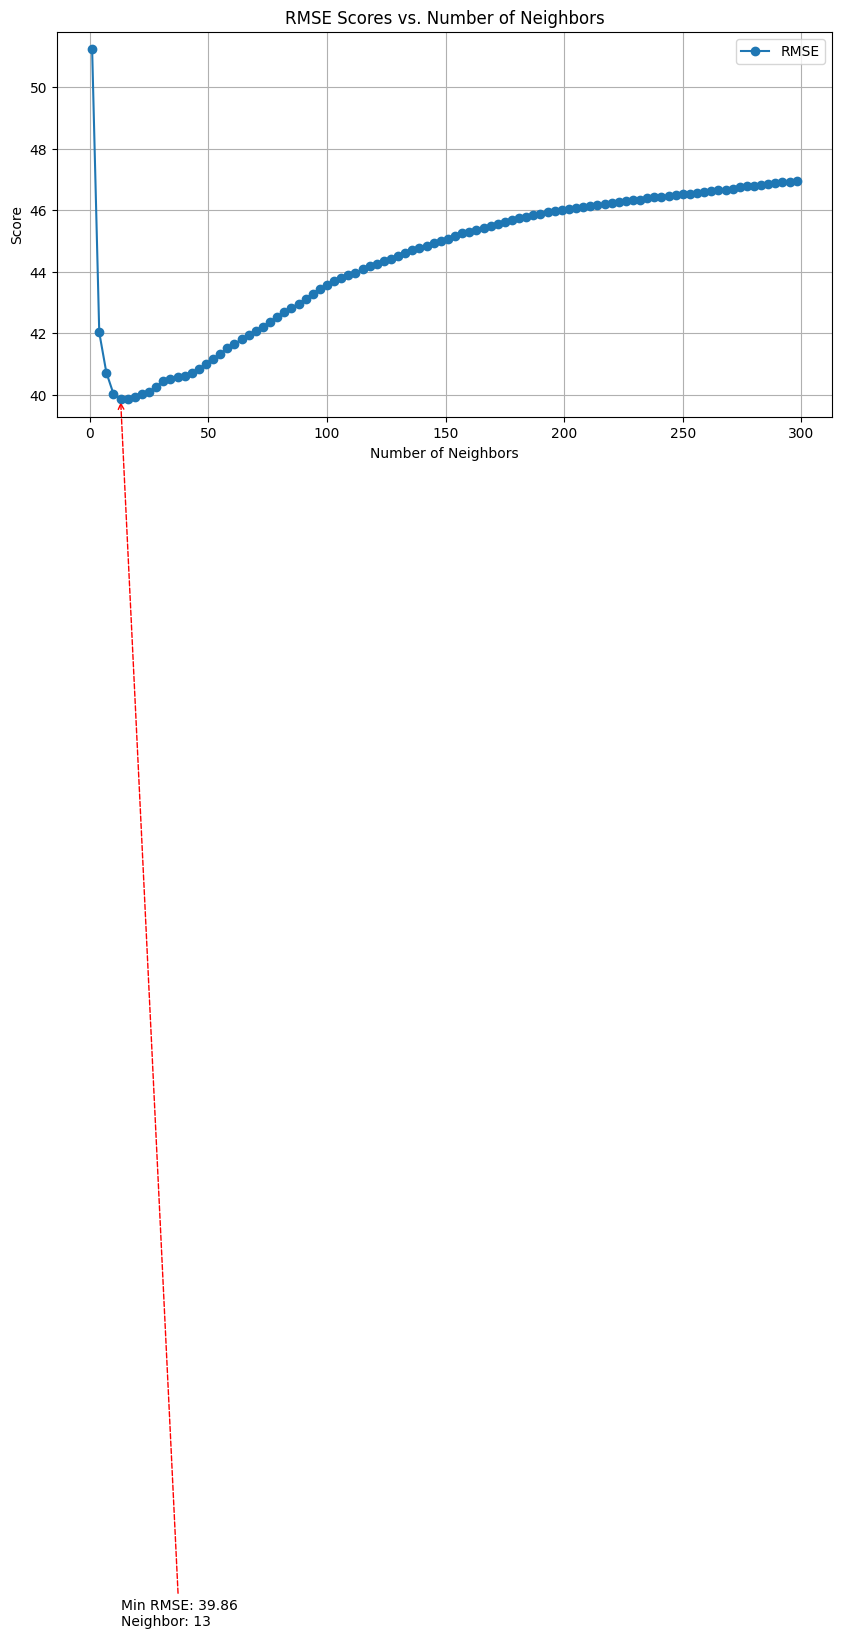

In [ ]:
# Plot RMSE and R^2 scores
plt.figure(figsize=(10, 5))
plt.plot(neighbours, regression_rmse, label='RMSE',marker='o')
#plt.plot(neighbours, r2_scores, label='R^2')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = neighbours[regression_rmse.index(min_rmse)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Min RMSE: {min_rmse:.2f}\nNeighbor: {min_neighbor}',
             xy=(min_neighbor, min_rmse), xycoords='data',
             xytext=(min_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

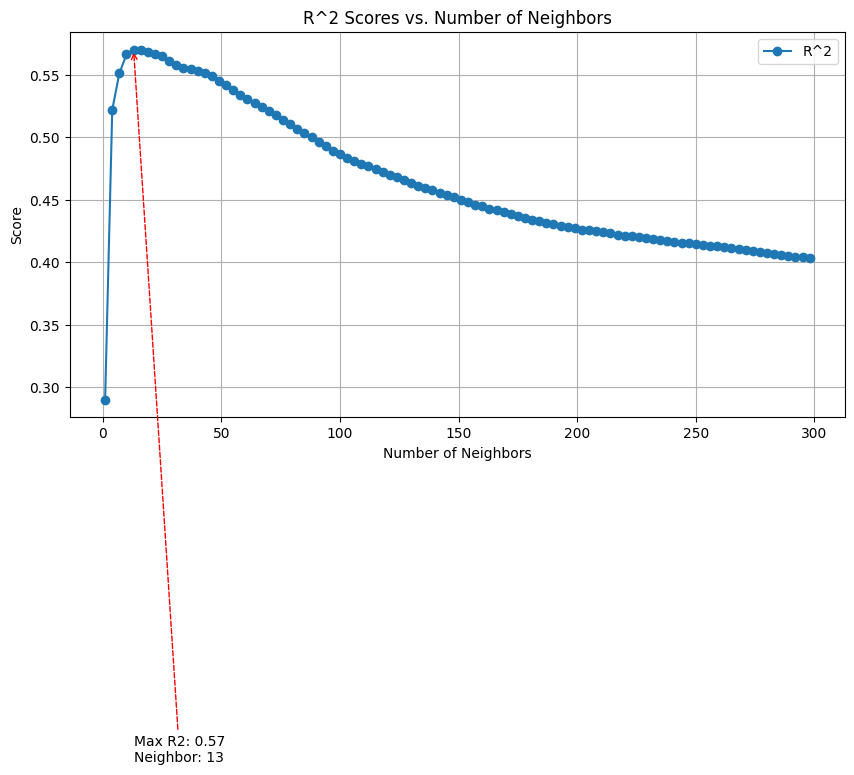

In [ ]:
plt.figure(figsize=(10, 5))
#plt.plot(neighbours, regression_rmse, label='RMSE')
plt.plot(neighbours, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = neighbours[r2_scores.index(max_r2)]

# Add a line from the lowest RMSE point to the x-axis
plt.annotate(f'Max R2: {max_r2:.2f}\nNeighbor: {max_neighbor}',
             xy=(max_neighbor, max_r2), xycoords='data',
             xytext=(max_neighbor, 0), textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

plt.show()

In [ ]:
p = np.arange(1,5,1)
regression_rmse = []
r2_scores = []
for i in p:
    model = KNeighborsRegressor(n_neighbors=13, p = i )
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse= mean_squared_error(y_test, y_pred, squared=False)
    regression_rmse.append(rmse)
    r2_scores.append(r2_score(y_test, y_pred))
    #regression_models.append(str(model))
    #print(f"RMSE of {model}: {rmse}")
    #print(f"R2 of {model}: {r2_score(y_test, y_pred)}")
    print(i)

1
2
3
4


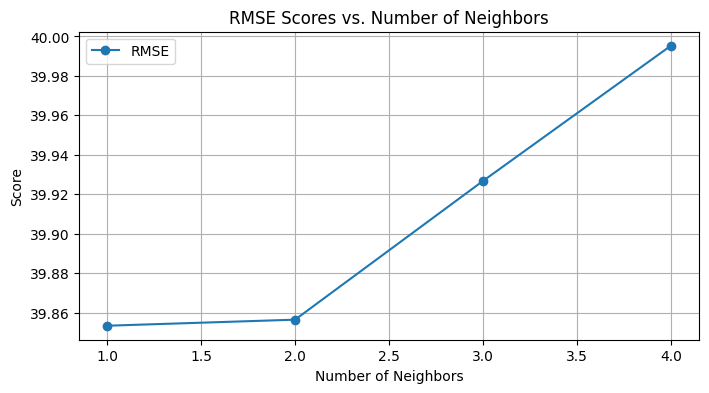

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(p, regression_rmse, label='RMSE',marker='o')
#plt.plot(neighbours, r2_scores, label='R^2')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('RMSE Scores vs. Number of Neighbors')
plt.grid()

min_rmse = min(regression_rmse)
min_neighbor = p[regression_rmse.index(min_rmse)]


plt.show()

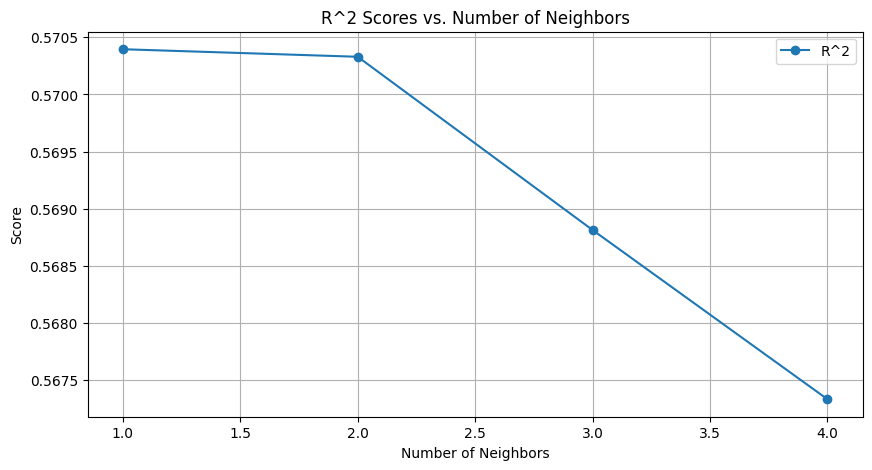

In [ ]:
plt.figure(figsize=(10, 5))
#plt.plot(neighbours, regression_rmse, label='RMSE')
plt.plot(p, r2_scores, label='R^2',marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.title('R^2 Scores vs. Number of Neighbors')
plt.grid()

max_r2 = max(r2_scores)
max_neighbor = p[r2_scores.index(max_r2)]
plt.show()

In [ ]:
model = KNeighborsRegressor(n_neighbors=13, p = 1 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse= mean_squared_error(y_test, y_pred, squared=False)
r2_score = r2_score(y_test, y_pred)
print('RMSE: ',rmse)
print('R2: ',r2_score)

RMSE:  39.85337166695397
R2:  0.5703961687562928


In [ ]:
test = pd.read_csv('DataSetRetail.csv')
x_test = test[['record_ID','sku_id','total_price','is_featured_sku','is_display_sku']]

In [ ]:
model = KNeighborsRegressor(n_neighbors=13, p = 1 )
model.fit(x,y)

KNeighborsRegressor(n_neighbors=13, p=1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
submission = pd.DataFrame()
submission['record_ID'] = x_test['record_ID']
submission['units_sold_float'] = y_pred
submission['units_sold'] = y_pred.astype(int)

In [ ]:
submission.to_csv('submission_my.csv')